In [2]:
%reload_ext autoreload
%autoreload 2

from IPython.display import display, Math

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

from part3 import *

## Mathematical and Numerical Physics
### Numerical part 3
#### Kevin Vonk, s1706896, _Jan 2021_

## General part
### Question 1
#### a.

The summation term in eq. (1) of the assignment has the same form as an element-wise matrix multiplication, but the indices are off. The general form of matrix multiplication $\boldsymbol{C} = \boldsymbol{A}\boldsymbol{B}$ is (using the same indices as eq. (1) of the assignment),
\begin{align*}
    c_{jk} = \sum_{i=1}^n a_{ji}b_{ik}.
\end{align*}
From this we see that the summation index is the column index of the first operand and the row index of the second operand. We can achieve this form in eq. (1) of the assignment by transposing the first operand,
\begin{align*}
U_{ij} = U^T_{ji} = u'_{ji}.
\end{align*}
So,
\begin{align*}
    \sum_{i=1}^N u'_{ji}u_{ik} = c_{jk} = \delta_{jk}.
\end{align*}
From the delta we can deduce that when the indices $j$ and $k$ are equal, $c_{jk} = 1$. Otherwise, it is zero. These indices are only equal on the diagonal, so $\boldsymbol{C} = \boldsymbol{I}$. Changing from element-wise to general matrix products, we can write the final expression as,
\begin{align*}
    \boldsymbol{U}^T\boldsymbol{U} = \boldsymbol{I},
\end{align*}
which proves the equivalence.

# TODO: Prove UU^T = I and statement

#### b.
The results and code generating the results are found below.

In [3]:
dim = 3

U = ortho_group.rvs(dim)
I = np.identity(dim)

display(Math(r"\boldsymbol{U} = " + to_latex(U, 2)))

# Use np.allclose() to ignore IEEE 754 floating point rounding errors.
if np.allclose(U @ U.T, I) and np.allclose(U.T @ U, I):
    display(Math(r"\text{Python reports:}\quad\boldsymbol{U}\boldsymbol{U}^T = \boldsymbol{U}^T\boldsymbol{U} = \boldsymbol{I}."))
else:
    print("The statements i) and ii) do not hold.")


<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### c.
Firstly, lets prove symmetry. Starting of with the expression for $\boldsymbol{B}$,
\begin{align*}
    \boldsymbol{B} &= \boldsymbol{U}^T \boldsymbol{A} \boldsymbol{U} \\
    \boldsymbol{B}^T &= (\boldsymbol{U}^T \boldsymbol{A} \boldsymbol{U})^T = \boldsymbol{U}^T \boldsymbol{A}^T \boldsymbol{U} = \boldsymbol{U}^T \boldsymbol{A} \boldsymbol{U} \\
    &\rightarrow \boldsymbol{B}^T = \boldsymbol{B}.
\end{align*}

So, $\boldsymbol{B}$ is symmetric. Next, for the eigenvalues,
\begin{align*}
    \det(B) &= \det(U^T A U) = \det(U^T)\det(A)\det(U) \\
    &= \det(U^T)\det(U)\det(A) = \det(U^T U)\det(A) \\
    &= \det(I)\det(A) \\
    &= \det(A).
\end{align*}
And hence, by virtue of their determinants being identical, the eigenvalues $\lambda$ of $\boldsymbol{B}$ (determined by $\det(B - \lambda I) = 0$) will be identical too.

#### d.

In [4]:
A = np.diag([1, 2, 3])
B = U.T @ A @ U

valB, vecB = np.linalg.eig(B)

vecs = ",".join([to_latex(vecB[:, i].reshape((3,1)), 2, "pmatrix") for i in range(len(valB))])

display(Math(r"\text{Eigenvalues of}\; \boldsymbol{B} = " + to_latex(valB.reshape((3,1)), 0, "pmatrix")))
display(Math(r"\text{Eigenvectors of}\; \boldsymbol{B} = " + vecs))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

What we can see from the results is that the eigenvalues of $\boldsymbol{A}$ and $\boldsymbol{B}$ are identical. Additionally, the eigenvalues that have been found are the same values found on the diagonal of $\boldsymbol{A}$ (which makes sense, as all the off-diagonal components are zero). Lastly, the eigenvectors of $\boldsymbol{B}$ are rows of the $\boldsymbol{U}$ matrix. In this case the eigenvector corresponding to the lowest eigenvalue is the first row in $\boldsymbol{U}$, and the eigenvector corresponding to the highest eigenvalue is the last row, etc.

### Question 2
#### a.

In [5]:
rng = np.random.default_rng()
vec_start = rng.random(3)

eig_val, eig_vec, iter = eigen_power(B, vec_start, ret_cycles=True)

display(Math(r"\lambda_{max} = " + f"{eig_val:.4f}" + r"; \quad \text{Eigenvector}=" + to_latex(eig_vec.reshape(3,1), type="pmatrix") + r"; \quad N_{iter} = " + f"{iter}"))

<IPython.core.display.Math object>

We can see that the power method algorithm has found the largest eigenvalue and corresponding eigenvalue. The amount of iterations required to reach $\epsilon < 10^{-8}$ is also given above. Note: I am deliberately not noting any numbers in this explaination text, since $\boldsymbol{U}$ (and thus $\boldsymbol{B}$ and its eigenvectors/eigenvalues) is based on random values which change in every run of the Notebook.

The eigenvalue found using this method is not 100% accurate. Its accuracy is determined by floating point rounding errors and the given accuracy. We know that the analytical maximum eigenvalue of $\boldsymbol{A}$ is $\lambda_{ana,max} = 3$. So, we can compare the analytical value $\lambda_{ana}$ to the value found using the Numpy library $\lambda_{Python}$ and to the value found using the power method $\lambda_{power}$.

In [6]:
l_ana = 3
diff_ana_python = np.abs(l_ana - np.max(valB))
diff_ana_power = np.abs(l_ana - eig_val)
diff_python_power = np.abs(np.max(valB) - eig_val)

display(Math(r"|\lambda_{ana} - \lambda_{Python}| = " + f"{diff_ana_python:.3e}"))
display(Math(r"|\lambda_{ana} - \lambda_{power}| = " + f"{diff_ana_power:.3e}"))
display(Math(r"|\lambda_{Python} - \lambda_{power}| = " + f"{diff_python_power:.3e}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From these results we find that there is no difference between the analytical eigenvalue and the eigenvalue determined by Numpy. However, there is a difference between these two and our implemented power method, in the order of the provided accuracy $10^{-8}$. So, this difference seems reasonable.

#### b.

The same random starting vector as used in a) will be used again.

In [7]:
eig_val, eig_vec, iter = eigen_inv_power(B, vec_start, ret_cycles=True)

display(Math(r"\lambda_{max} = " + f"{eig_val:.4f}" + r"; \quad \text{Eigenvector}=" + to_latex(eig_vec.reshape(3,1), type="pmatrix") + r"; \quad N_{iter} = " + f"{iter}"))

<IPython.core.display.Math object>

We can see from the results that we have computed the smallest eigenvalue and its corresponding eigenvector.

#### c.

We will again use the same random starting vector as we have done at a) and b). According to the lecture notes sec. 2.3.1, "If we choose $s$ close to $\lambda$ ... the best guess for $\lambda$ is then given by ...",

\begin{align*}
    \lambda \approx \frac{1}{S_n} + s.
\end{align*}

Since the last eigenvalue we are looking for is $\lambda = 2$, we will need to use a shift that is somewhat close to it in order to find this eigenvalue using the shifted inverse power method. Lets assume we are able to make a somewhat reasonable guess of the eigenvalue, so we pick $s = 1.7$. The results are found below.

In [8]:
eig_val, eig_vec, iter = eigen_shift_inv_power(B, vec_start, shift=1.7, ret_cycles=True)

display(Math(r"\lambda_{max} = " + f"{eig_val:.4f}" + r"; \quad \text{Eigenvector}=" + to_latex(eig_vec.reshape(3,1), type="pmatrix") + r"; \quad N_{iter} = " + f"{iter}"))

<IPython.core.display.Math object>

We see that we have now obtained the last missing eigenvalue. Our value for the shift $s = 1.7$ seems to be a reasonable value since it brought us the correct eigenvalue we were looking for.

### Question 3
#### a.

In [9]:
C = np.diag(np.array([1, 2, 2]))
B = U.T @ C @ U

eig_val, eig_vec = eigen_power(B, vec_start)
np_eig_val, np_eig_vec = np.linalg.eig(B)
vecs = ",".join([to_latex(np_eig_vec[:, i].reshape((3,1)), 2, "pmatrix") for i in range(len(valB)) if np.isclose(np_eig_val[i], 2)])

display(Math(r"\text{Numpy eigenvectors}=" + vecs + r"; \quad \text{Power iteration eigenvector}=" + to_latex(eig_vec.reshape(3,1), type="pmatrix") + r"; \quad \lambda_{power}=" f"{eig_val:.4f}"))

<IPython.core.display.Math object>

We can see that while the found eigenvalue is what we would theoretically expect ($\lambda_{max} = 2$), the eigenvector result is peculiar as it indeed does not correspond to vectors found using Numpy. The reason that the found eigenvector is invalid is because we have degeneracy in the eigenvalues, but nowhere in the algorithm do we actually account for this. To be more precise, the whole power iteration algorithm relies on the fact that eigenvalues are ordered from largest to smallest, $|\lambda_n| > |\lambda_{n+1}|$ for $n = 1, ..., N-1$ (eq. (2.5) in the lecture notes). Note specifically here that we use greater than, meaning that the two eigenvalues cannot be equal. Because the requirements for the power iteration are no longer satisfied, the results found using it are completely baseless (and thus wrong). This also implies that the found eigenvalue is wrong, even though it does provide the correct answer in this case.

#### b.

In [10]:
C = np.diag(np.array([1, 2, -2]))
B = U.T @ C @ U

eig_val, eig_vec = eigen_power(B, vec_start)
np_eig_val, np_eig_vec = np.linalg.eig(B)
vecs = ",".join([to_latex(np_eig_vec[:, i].reshape((3,1)), 2, "pmatrix") for i in range(len(valB))])

display(Math(r"\lambda_{numpy} = " + to_latex(np_eig_val, type="pmatrix") + r"; \quad \text{Numpy eigenvectors}=" + vecs))
display(Math(r"\lambda_{power}=" f"{eig_val:.4f}" + r"; \quad \text{Power iteration eigenvector}=" + to_latex(eig_vec.reshape(3,1), type="pmatrix")))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We find here that Numpy is able to compute the correct eigenvalues and corresponding eigenvectors. The power method fails completely here, yielding both an incorrect eigenvalue as eigenvector. This is what we predicted in a) already, where "by chance" the found eigenvalue was still correct. The reason the power method fails again has to do with the constraint $|\lambda_n| > |\lambda_{n+1}|$ for $n = 1, ..., N-1$. Note that we take the absolute values of the eigenvalues, which causes the problem this time. As $|-2| = |2|$, the constraint is not upheld and we cannot use the power method.

So, the power method fails when any of the (absolute) eigenvalues is degenerate. One of the ways we could check if the result is reasonable is by using our conclusions determined at 1d). There, we determined that the eigenvalues are found in the diagonal $\boldsymbol{A}$ matrix (or $\boldsymbol{C}$ or $\boldsymbol{F}$ in these cases). Additionally, the found eigenvectors correspond to rows of the $\boldsymbol{U}$ matrix.

Another way to test whether the answer is reasonable, or if we don't know any of the previous matrices, is by testing various relations that must hold for eigenvalues and eigenvectors. We know for example that $\boldsymbol{A}\vec{v} = \lambda\vec{v}$ for a matrix $\boldsymbol{A}$ with eigenvector $\vec{v}$ and eigenvalue $\lambda$. Let us check whether or not this relation holds for the power iteration result:

In [11]:
if np.allclose(C @ eig_vec, eig_val * eig_vec):
    print("The eigenvalue/eigenvector relation holds")
else:
    print("The eigenvalue/eigenvector relation does not hold for the found results")

The eigenvalue/eigenvector relation does not hold for the found results


Bingo! We can indeed verify that our found results are wrong. A way we could work around this problem is by introducting an offset $\delta$. If we add or subtract this offset from the values which cause the degeneracy, we are able to lift it. This does introduce a new error in both the found eigenvalue and eigenvector, but we could use these values as guesses in an algorithm which circumvents the problem entirely, but takes a while to converge. As an example,

In [12]:
delta = 0.05

C = np.diag(np.array([1, 2 + delta, -2 + delta]))
B = U.T @ C @ U

eig_val, eig_vec = eigen_power(B, vec_start)

display(Math(r"\lambda_{max} = " + f"{eig_val:.4f}" + r"; \quad \text{Eigenvector}=" + to_latex(eig_vec.reshape(3,1), type="pmatrix")))

<IPython.core.display.Math object>

In [13]:
if np.allclose(np.around(B @ eig_vec, 2), np.around(eig_val * eig_vec, 2)):
    print("The eigenvalue/eigenvector relation holds")
else:
    print("The eigenvalue/eigenvector relation does not hold for the found results")

The eigenvalue/eigenvector relation does not hold for the found results


The accuracy of this is poor however, in this case I have rounded the results to two decimals in order for the relation to hold.

A much better way to avoid this problem would be to construct a new basis in which the degeneracy is lifted, much like what is done for degenerate perturbation theory in Quantum Mechanics. 

### Question 4
#### a.

In order to analyse this problem, we must first convert it into dimensionless units. Introducing $\rho = \frac{r}{r_0}$ and $\lambda = \frac{E}{V_0}$, where $r_0 = \frac{\hbar}{\sqrt{2 m_e V_0}}$ and $V_0 = \frac{1}{2}\frac{m_e e^4}{(4\pi\epsilon_0)^2 \hbar^2}$, we can start rewriting the radial Schrödinger equation. 

\begin{equation*}
    \left(-\frac{\hbar^2}{2m_e} \frac{d^2}{dr^2} + \frac{\hbar^2 l(l+1)}{2m_e r^2} + V(r)\right)\zeta(r) = E\zeta(r).
\end{equation*}

Dividing this expression by $V_0$,

\begin{align*}
    \left(-\frac{\hbar^2}{2m_e V_0} \frac{d^2}{dr^2} + \frac{\hbar^2 l(l+1)}{2m_e r^2 V_0} + \frac{V(r)}{V_0}\right)\zeta(r) &= \frac{E}{V_0}\zeta(r), \\
    \left(-(r_0^2) \frac{d^2}{dr^2} + \frac{l(l+1)}{\rho^2} + \frac{V(r)}{V_0}\right)\zeta(r) &= \lambda\zeta(r).
\end{align*}

Rewriting $r \rightarrow \rho$,

\begin{align*}
    \left(-(r_0^2) \frac{d^2 \rho}{dr^2} \frac{d^2}{d\rho^2} + \frac{l(l+1)}{\rho^2} + \frac{V(\rho)}{V_0}\right)\zeta(\rho) &= \lambda\zeta(\rho), \\
    \left(-\frac{d^2}{d\rho^2} + \frac{l(l+1)}{\rho^2} + \frac{V(\rho)}{V_0}\right)\zeta(\rho) &= \lambda\zeta(\rho).
\end{align*}

We can write this in the form suggested by the lecture notes,

\begin{equation*}
    \frac{d^2}{d\rho^2}\zeta(\rho) = (W(\rho) - \lambda)\zeta(\rho),
\end{equation*}

where

\begin{equation*}
    W(\rho) = \frac{l(l+1)}{\rho^2} + \frac{V(\rho)}{V_0}.
\end{equation*}

Lastly, we must evaluate the last term of $W(\rho)$. Lets consider $V(\rho)$,

\begin{align*}
    V(\rho) &= \frac{-e^2}{4\pi\epsilon_0 r_0 \rho} \\
    &= \frac{-e^2}{4\pi\epsilon_0 \rho}\frac{\sqrt{2 m_e V_0}}{\hbar} \\
    &= \frac{-e^2}{4\pi\epsilon_0 \rho}\sqrt{\frac{m_e^2 e^4}{(4\pi\epsilon_0)^2 \hbar^2}} \\
    &= \frac{-m_e e^4}{(4\pi\epsilon_0)^2\hbar^2 \rho}\\
    &= \frac{-2 V_0}{\rho}.
\end{align*}

Hence,
\begin{equation*}
    \frac{V(\rho)}{V_0} = -\frac{2}{\rho}.
\end{equation*}

We solve this problem using the shifted inverse power iteration. The code and the results are found below.

Found eigenvalue lambda = -0.25


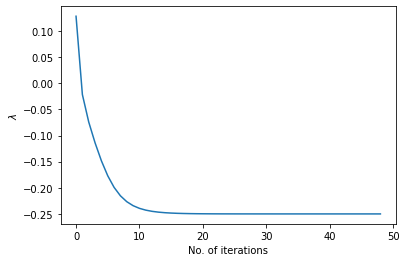

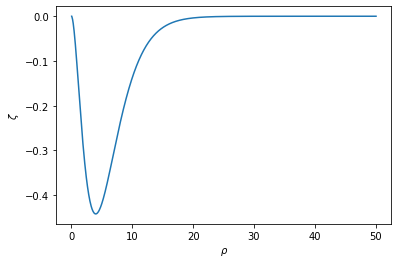

In [14]:
RHO_BOUNDS = (0.05, 50.05)
W = lambda rho, l: l*(l+1) / rho**2 - 2 / rho

h = 0.05
l = 1
shift = -1

rho = np.linspace(*RHO_BOUNDS, num=round((RHO_BOUNDS[1] - RHO_BOUNDS[0])/h)+1)
zeta = 2*rng.random(len(rho[1:-1])) - 1
zeta /= np.linalg.norm(zeta)

diag = 1/h**2 * (2 + h**2 * W(rho[1:-1], l))
off_diag = -1 * 1/h**2 * np.ones(len(diag) - 1)

res = []
for eig_val, eig_vec in sparse_sipi(diag, off_diag, zeta, shift=shift):
    res.append(eig_val)

eig_vec /= np.sqrt(h)

plt.plot(range(len(res)), res)
plt.xlabel("No. of iterations")
plt.ylabel(r"$\lambda$")
plt.figure()
plt.plot(rho, [0, *eig_vec, 0])
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\zeta$")

print(f"Found eigenvalue lambda = {eig_val:.2f}")



From the results we see that we obtain $E = -0.25 \; \text{Ry}$. The energy eigenvalues of an hydrogen atom are given by $E = -\frac{1 \; \text{Ry}}{n^2}$. Setting these two equal to one another yields $n = 2$. Given that $l = 1$, we have the requirement that $n \geq 2$. So, this is the lowest energy state for an orbital angular momentum $l = 1$, and this corresponds to the 2P-electron shell.

Quick verification with previous work done for the Excitons project of Computational Physics 1 confirms that this result and the obtained wave function are indeed correct.

### b.
The code and the results are found below.

Found eigenvalues lambda = -0.25 and lambda = -0.11


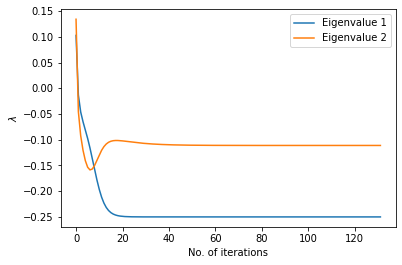

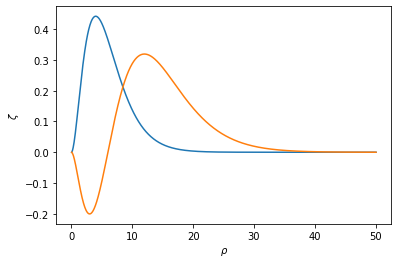

In [15]:
res0 = []
res1 = []

zeta1 = 2*rng.random(len(rho[1:-1])) - 1
zeta1 /= np.linalg.norm(zeta1)

zeta2 = 2*rng.random(len(rho[1:-1])) - 1
zeta2 /= np.linalg.norm(zeta2)

for eig_val, eig_vec in sparse_double_sipi(diag, off_diag, zeta1, zeta2, shift=shift):
    res0.append(eig_val[0])
    res1.append(eig_val[1])

eig_vec[0] /= np.sqrt(h)
eig_vec[1] /= np.sqrt(h)

plt.plot(range(len(res0)), res0, label="Eigenvalue 1")
plt.plot(range(len(res1)), res1, label="Eigenvalue 2")
plt.xlabel("No. of iterations")
plt.ylabel(r"$\lambda$")
plt.legend()
plt.figure()
plt.plot(rho, [0, *eig_vec[0], 0], label="Eigenvalue 1")
plt.plot(rho, [0, *eig_vec[1], 0], label="Eigenvalue 2")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\zeta$")

print(f"Found eigenvalues lambda = {eig_val[0]:.2f} and lambda = {eig_val[1]:.2f}")

What we have found here are again the energy corresponding to the 2P-electron shell, but now the 3P-electron shell as well, i.e. n = 3. This result has been verfied again using the equation above, as well as by means of previous work in Computational Physics.

## Polarons and bipolarons
### Question 5
#### a.

Let us rewrite the following equation in a dimensionless form,
\begin{align*}
    -\left[\frac{d^2}{dx^2} + \frac{2m\alpha}{\hbar^2} |\phi(x)|^2\right]\phi(x) &= \frac{2mE}{\hbar^2}\phi(x).
\end{align*}

Dividing by $E_0$, and changing the coordinates $x \rightarrow y$ and $\phi(x) \rightarrow f(y)$,
\begin{align*}
    -\left[\frac{4}{\alpha a}\frac{d^2}{dx^2} + \frac{8m}{a\hbar^2} |\phi(x)|^2\right]\phi(x) &= \frac{2m}{\hbar^2}\lambda\phi(x), \\
    -\left[\frac{4a}{\alpha}\frac{d^2}{dy^2} + \frac{8m}{a\hbar^2} |f(y)|^2\right]f(y) &= \frac{2m}{\hbar^2}\lambda f(y).
\end{align*}

Lastly, we can write out $\alpha$ and perform some algebra,
\begin{align*}
    -\left[\frac{4m}{2\hbar^2}\frac{d^2}{dy^2} + \frac{8m}{a\hbar^2} |f(y)|^2\right]f(y) &= \frac{2m}{\hbar^2}\lambda f(y), \\
    -\left[\frac{d^2}{dy^2} + \frac{4}{a} |f(y)|^2\right]f(y) &= \lambda f(y). \\
\end{align*}
# TODO: Fix second term

The solution is given by the lecture notes eq. (5.67),
\begin{align*}
    \phi(x) = \sqrt{\frac{a}{2}} \frac{1}{\cosh(ax)}.
\end{align*}
Performing the change of variables from $x$ to $y$ and renormalising the resulting $f(y)$ yields as a solution,
\begin{align*}
    f(y) = \frac{1}{\sqrt{2}\cosh(y)}.
\end{align*}

In order to prove that any shift of this function by a fixed number $Y$ is also a solution to the non-linear Schrödinger equation, let us define $y' = y - Y$. This yields an $f(y')$,
\begin{equation*}
    f(y') = \frac{1}{\sqrt{2}\cosh(y')}.
\end{equation*}
If this function is a valid solution, it must hold when filled in into the non-linear Schrödinger equation. Filling in,
\begin{align*}
    -\frac{1}{\sqrt{2}}\frac{d^2}{dy^2}\frac{1}{\cosh(y')} - \frac{2}{\sqrt{2}}\left|\frac{1}{\cosh(y')}\right|^2\frac{1}{\cosh(y')} = \frac{\lambda}{\sqrt{2}}\frac{1}{\cosh(y')}.
\end{align*}
$\cosh(x)$ for any $x$ is bounded between $[0, 1]$, so we can safely drop the absolute value sign. We can evaluate the second derivative using the expression in the lecture notes between eq. (5.66) and eq. (5.67). This yields,
\begin{align*}
    -\frac{1}{\sqrt{2}}\left(\frac{1}{\cosh(y')} - \frac{2}{\cosh^3(y')}\right) - \frac{2}{\sqrt{2}}\frac{1}{\cosh^3(y')} &= \frac{\lambda}{\sqrt{2}}\frac{1}{\cosh(y')}, \\
    -\frac{1}{\sqrt{2}}\frac{1}{\cosh(y')} &= \frac{\lambda}{\sqrt{2}}\frac{1}{\cosh(y')}, \\
    \lambda &= -1.
\end{align*}

So, if $f(y)$ is a solution, $f(y - Y)$ is also a solution for any $y - Y$.

### b.
We can discretise the problem as follows, using central second-order finite difference,
\begin{align*}
    \frac{f(y_{j+1}) - 2f(y_j) + f(y_{j-1})}{h^2} &= -\left(4|f(y_j)|^2 + \lambda\right) f(y_j), \\
    \frac{1}{h^2}\left[-f(y_{j+1}) + (2 - 4h^2|f(y_j)|^2)f(y_j) - f(y_{j-1})\right] &= \lambda f(y_j). \\
\end{align*}

The implementation of this scheme, as well as the results are found below.

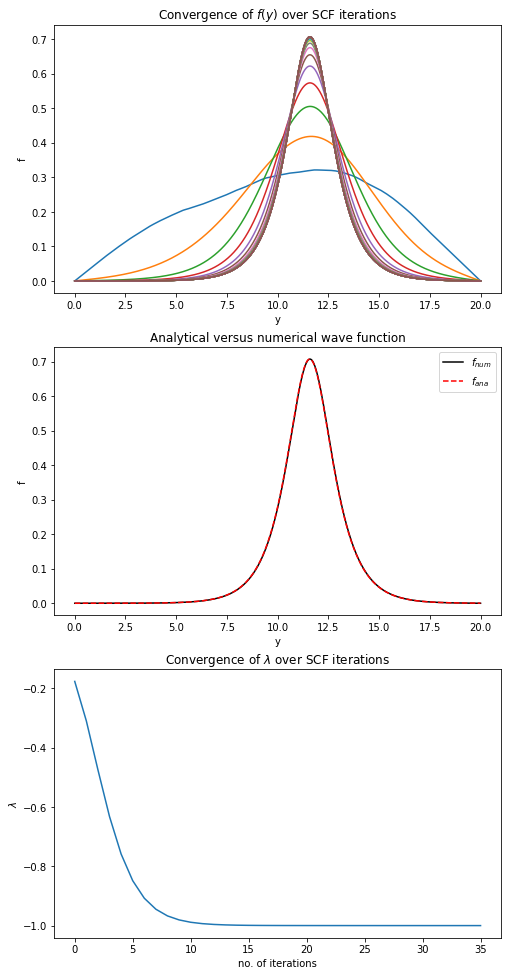

In [16]:
N = 1E3
h = 0.02
shift = -3

y = np.linspace(0, N*h, num=int(N)+1)
f = wf_norm(2*rng.random(len(y)) - 1, h)

lambda_ = []

plt.figure(figsize=(8, 3.5*4.8))
plt.subplot(311)
for val, vec in sparse_scf(h, f, shift):
    lambda_.append(val)
    vec = np.abs(vec)
    plt.plot(y, [0, *vec, 0])

plt.xlabel("y")
plt.ylabel("f")
plt.title(r"Convergence of $f(y)$ over SCF iterations")

plt.subplot(312)
plt.plot(y, [0, *vec, 0], 'black', label=r"$f_{num}$")
plt.plot(y, 1/(np.sqrt(2) * np.cosh(y - y[np.argmax(vec)])), 'r--', label=r"$f_{ana}$")
plt.xlabel("y")
plt.ylabel("f")
plt.title("Analytical versus numerical wave function")
plt.legend()

plt.subplot(313)
plt.plot(range(len(lambda_)), lambda_)
plt.xlabel("no. of iterations")
plt.ylabel(r"$\lambda$")
plt.title(r"Convergence of $\lambda$ over SCF iterations");

From the resulting figures we see that the numerical model converges to the analytical wave function, given that we shift $f_{ana}$ by $Y$ such that $Y$ corresponds to the $y$-value, where the numerical wave function is at a maximum. From a) we know that this shifted wave function is still a valid result to the non-linear Schrödinger equation. From the results we can also deduce that $\lambda_{num} = -1$, which corresponds to the value found in the proof of a). So, our numerical model seems to function properly and be accurate.

### Question 6
#### a.

# TODO: Derive all of this

#### b.

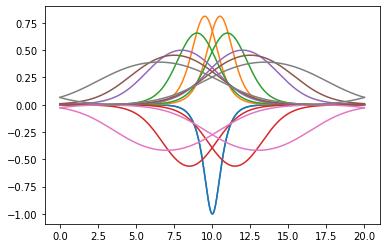

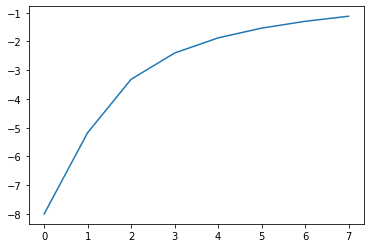

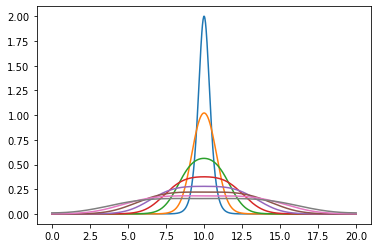

In [28]:
_S = lambda f1, f2: np.trapz(f1 * f2, dx=h)
_n = lambda f1, f2: (f1**2 + f2**2 + 2*_S(f1, f2)*f1*f2) / (1 + _S(f1, f2)**2)

Y = range(8)
beta = 0
gamma = 0.4

lambda_ = []
n = []

for i, Y_ in enumerate(Y):
    f = wf_norm(2*rng.random(len(y)) - 1, h)
    for val, f1, f2 in bipolaron(y, h, f, Y_, beta, gamma, shift, TOL_SCF=1E-4):
        continue

    lambda_.append(val)
    n.append(_n(f1, f2))

    plt.plot(y, f1, f'C{i}')
    plt.plot(y, f2, f'C{i}')

plt.figure()
plt.plot(Y, lambda_)

plt.figure()
for n_ in n:
    plt.plot(y, n_)

#### c.

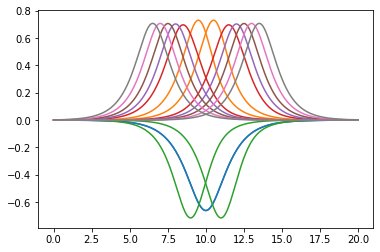

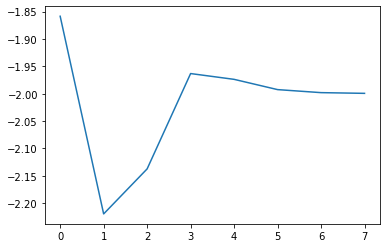

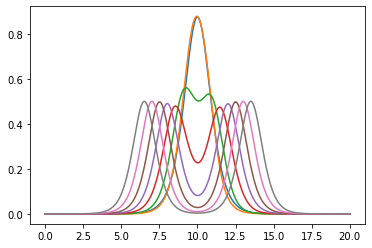

In [29]:
beta = 9/8

lambda_ = []
n = []

for i, Y_ in enumerate(Y):
    f = wf_norm(2*rng.random(len(y)) - 1, h)
    for val, f1, f2 in bipolaron(y, h, f, Y_, beta, gamma, shift, TOL_SCF=1E-4):
        continue

    lambda_.append(val)
    n.append(_n(f1, f2))

    plt.plot(y, f1, f'C{i}')
    plt.plot(y, f2, f'C{i}')

plt.figure()
plt.plot(Y, lambda_)

plt.figure()
for n_ in n:
    plt.plot(y, n_)

#### d.

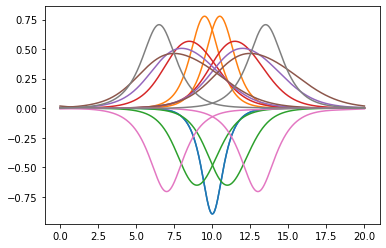

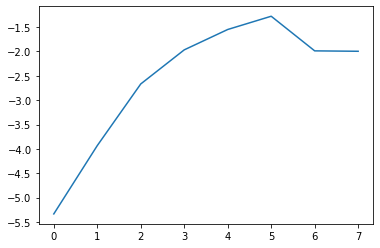

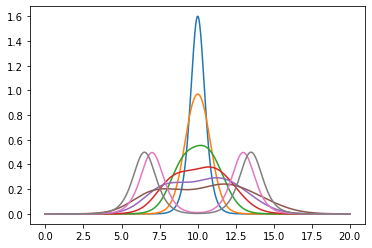

In [30]:
beta = 0.4

lambda_ = []
n = []

for i, Y_ in enumerate(Y):
    f = wf_norm(2*rng.random(len(y)) - 1, h)
    for val, f1, f2 in bipolaron(y, h, f, Y_, beta, gamma, shift, TOL_SCF=1E-4):
        continue

    lambda_.append(val)
    n.append(_n(f1, f2))

    plt.plot(y, f1, f'C{i}')
    plt.plot(y, f2, f'C{i}')

plt.figure()
plt.plot(Y, lambda_)

plt.figure()
for n_ in n:
    plt.plot(y, n_)